In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [3]:
from google.colab import drive

In [4]:
admissions_data = pd.read_csv("/content/drive/MyDrive/admissions_data.csv")
admissions_data.describe()
print(admissions_data.shape)

(500, 9)


In [5]:
# Splitting data into features and variables
labels = admissions_data.iloc[:, -1]
features = admissions_data.iloc[:, 1:8]

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state=42)

sc = StandardScaler()
features_train_scale = sc.fit_transform(features_train)
features_test_scale = sc.transform(features_test)

In [6]:
# NN
def design_model(feature_data):
    model = Sequential()
    num_features = feature_data.shape[1]
    input = tf.keras.Input(shape=(num_features))
    model.add(input)

    hidden_layer = layers.Dense(4, activation='relu')
    model.add(hidden_layer)
    model.add(layers.Dropout(0.1))
    hidden_layer_2 = layers.Dense(2, activation='relu')
    model.add(hidden_layer_2)
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))

    opt = keras.optimizers.Adam(learning_rate=0.005)
    model.compile(loss='mse', metrics=['mae'], optimizer=opt)
    return model

In [7]:
# apply the model to the scaled training data
model = design_model(features_train_scale)
print(model.summary())
print('before:', model.trainable_variables)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 32        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 45 (180.00 Byte)
Trainable params: 45 (180.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
before: [<tf.Va

In [8]:
# apply early stopping for efficiency
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [9]:
# fit the model with 100 epochs and a batch size of 8
# validation split at 0.25
history = model.fit(features_train_scale, labels_train.to_numpy(), epochs=100, batch_size=8, verbose=1, validation_split=0.25, callbacks=[es])

Epoch 1/100
36/36 [==============================] - 2s 9ms/step - loss: 0.6708 - mae: 0.7583 - val_loss: 0.3789 - val_mae: 0.5955
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 0.2639 - mae: 0.4924 - val_loss: 0.2120 - val_mae: 0.4379
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 0.1520 - mae: 0.3612 - val_loss: 0.1215 - val_mae: 0.3205
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0851 - mae: 0.2587 - val_loss: 0.0695 - val_mae: 0.2308
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0492 - mae: 0.1885 - val_loss: 0.0425 - val_mae: 0.1767
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0320 - mae: 0.1476 - val_loss: 0.0306 - val_mae: 0.1472
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0241 - mae: 0.1270 - val_loss: 0.0245 - val_mae: 0.1306
Epoch 8/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0212 - m

In [10]:
# evaluate the model
val_mse, val_mae = model.evaluate(features_test_scale, labels_test.to_numpy(), verbose=0)
print('after', model.trainable_variables)

after [<tf.Variable 'dense/kernel:0' shape=(7, 4) dtype=float32, numpy=
array([[ 0.2626715 ,  0.46992442, -0.30208957, -0.28032798],
       [-0.40619996, -0.41542405, -0.25322214,  0.2877187 ],
       [-0.54709196,  0.12054145,  0.20441079,  0.06811589],
       [-0.27588913,  0.3926496 ,  0.12932473, -0.11970782],
       [-0.09525701,  0.59964347, -0.19311959,  0.10885517],
       [-0.1338962 ,  0.42556036, -0.47839025, -0.21260376],
       [-0.36913225,  0.12944892, -0.17661603,  0.15135895]],
      dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.10244919,  0.06679595,  0.1693564 , -0.22688667], dtype=float32)>, <tf.Variable 'dense_1/kernel:0' shape=(4, 2) dtype=float32, numpy=
array([[ 0.1067284 ,  0.13758421],
       [-0.41176447, -0.63166857],
       [ 0.4973057 , -0.95975405],
       [ 0.5606817 ,  0.12793055]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([0.08775402, 0.01749778], dtype=float32)>, <tf.

In [11]:
# view the MAE performance
print("MAE: ", val_mae)

# evauate r-squared score
y_pred = model.predict(features_test_scale)

print(r2_score(labels_test, y_pred))

MAE:  0.06769854575395584
4/4 [==============================] - 0s 4ms/step
0.591344767883379


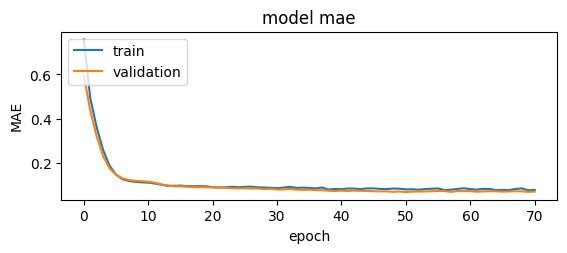

In [16]:
# plot MAE and val_MAE over each epoch
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')
plt.show()


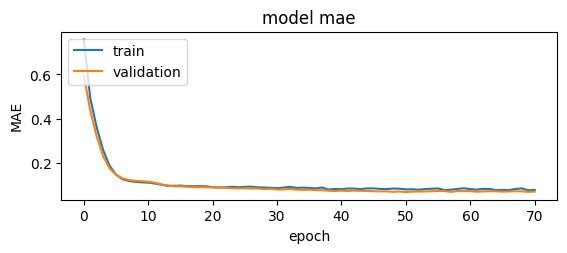

In [17]:
# plot MAE and val_MAE over each epoch
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')
plt.show()
